In [40]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

from tensorflow.keras.layers import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
from tensorflow.keras import losses 


In [41]:
data=pd.read_csv('"D:\THANH\RESEARCH\LE01\Final_project\Malware_subset.csv"')
y= data['Label']
features=['Label',' Protocol',' Bwd Packet Length Min',' Down/Up Ratio',' Min Packet Length']
X=data.drop(columns=features)

In [42]:
trans=QuantileTransformer()
test=trans.fit_transform(X)
transformer = MinMaxScaler()
X=transformer.fit_transform(test)
encoder=LabelEncoder()
y=encoder.fit_transform(data['Label'])
print(y)
print(y.shape)


[ 2  2  2 ... 10 10 10]
(834695,)


In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) 

In [44]:
print(x_train.shape)
print(y_train.shape)

(667756, 76)
(667756,)


In [45]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),    #Tạo feature maps
    tf.keras.layers.MaxPooling1D(pool_size=2),                                                                  #Giảm kích thước của feature maps
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),                                                                                  #Chuyển feature maps thành vector 1 chiều
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
  ])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                                patience=15,  # Stop training after 5 epochs with no improvement
                                verbose=1)  # Print messages during training

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Fit the model with early stopping callback
history=model.fit(x_train, y_train, batch_size=42, epochs=100,  # Adjust epochs if needed
          validation_data=(x_test, y_test),verbose=1)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
15899/15899 ━━━━━━━━━━━━━━━━━━━━ 188s 12ms/step - accuracy: 0.5241 - loss: 1.7077 - val_accuracy: 0.5508 - val_loss: 1.6029
Epoch 2/100
15899/15899 ━━━━━━━━━━━━━━━━━━━━ 203s 13ms/step - accuracy: 0.5532 - loss: 1.5867 - val_accuracy: 0.5556 - val_loss: 1.5698
Epoch 3/100
15899/15899 ━━━━━━━━━━━━━━━━━━━━ 197s 12ms/step - accuracy: 0.5550 - loss: 1.5647 - val_accuracy: 0.5590 - val_loss: 1.5532
Epoch 4/100
15899/15899 ━━━━━━━━━━━━━━━━━━━━ 190s 12ms/step - accuracy: 0.5593 - loss: 1.5449 - val_accuracy: 0.5616 - val_loss: 1.5389
Epoch 5/100
15899/15899 ━━━━━━━━━━━━━━━━━━━━ 175s 11ms/step - accuracy: 0.5603 - loss: 1.5360 - val_accuracy: 0.5608 - val_loss: 1.5379
Epoch 6/100
15899/15899 ━━━━━━━━━━━━━━━━━━━━ 174s 11ms/step - accuracy: 0.5613 - loss: 1.5287 - val_accuracy: 0.5623 - val_loss: 1.5293
Epoch 7/100
15899/15899 ━━━━━━━━━━━━━━━━━━━━ 208s 11ms/step - accuracy: 0.5616 - loss: 1.5250 - val_accuracy: 0.5622 - val_loss: 1.5265
Epoch 8/100
15899/15899 ━━━━━━━━━━━━━━━━━━━━ 538

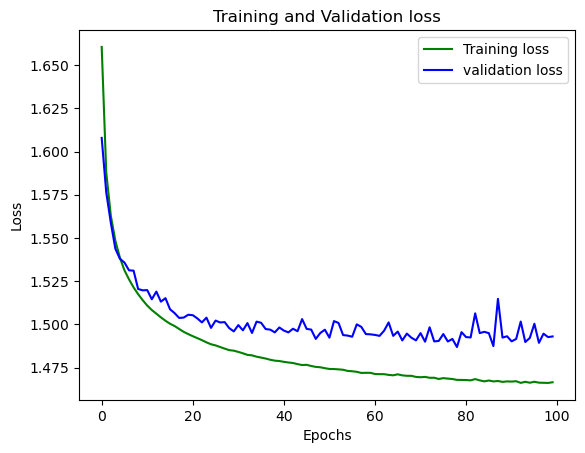

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

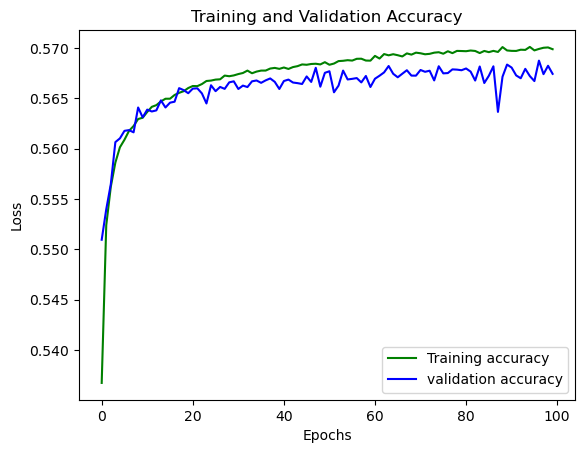

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy}")

# Predict classes for test data
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


5217/5217 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.5679 - loss: 1.4925
Test Accuracy: 0.5674288272857666
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step
Confusion Matrix:
[[ 1055     6   104    74   133    17     5     0     3    44  6495]
 [   15   185   525    86     7     2     0     0    50    10  7795]
 [   39   127  1488   187    21     9     0     0    34    24  9398]
 [ 1623    70   360  7218   326    14     1     0    18    40  9084]
 [   68     4    15   181  1438    40     2     0     2    16  5988]
 [   47     4    46    69   156   864     0     0     2    32  5289]
 [   65     2    48    68    98    15    28     0     2    42  5839]
 [    1    37   156    32     1     1     0     0     9     2  2367]
 [    7   133   590    81     2     2     0     0    55     7  6977]
 [  164     9    92    75    99    13     0     0    13   324  6418]
 [  732   148   502   451   201    20    10     0    38    66 79942]]


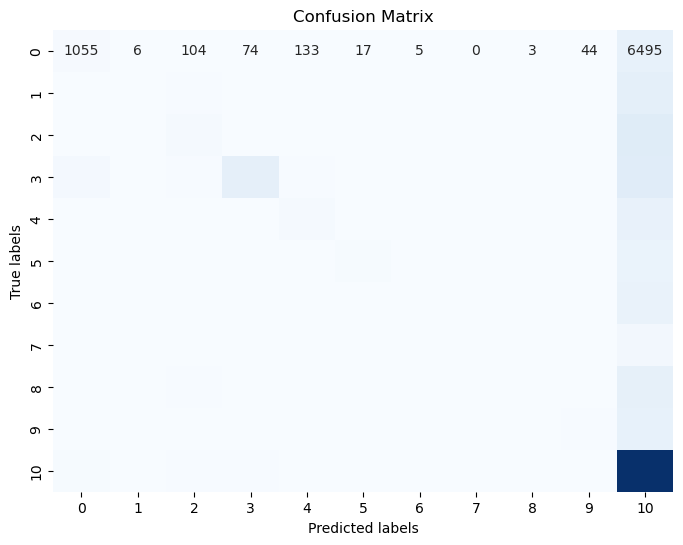

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predtrain=model.predict(x_train)
predtest=model.predict(x_test)


5217/5217 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step


array([[6.0594801e-02, 1.6050442e-01, 1.7226365e-01, ..., 1.5503424e-01,
        8.5627720e-02, 4.9966592e-01],
       [5.8814207e-09, 2.6172836e-05, 4.0901603e-05, ..., 2.5212095e-05,
        9.8788213e-09, 4.0120690e-04],
       [1.8614641e-04, 3.4489674e-03, 4.0559499e-03, ..., 3.0855425e-03,
        3.0303380e-04, 6.2777000e-03],
       ...,
       [2.3080801e-27, 1.9118083e-28, 3.0800587e-26, ..., 1.5969386e-26,
        1.9647465e-27, 1.3950024e-25],
       [1.4591918e-10, 1.3136513e-06, 1.6735752e-06, ..., 1.2316287e-06,
        1.9431254e-10, 2.9617347e-06],
       [7.4499734e-03, 8.4036263e-03, 6.4409235e-03, ..., 7.9128342e-03,
        1.0681178e-02, 1.4343543e-01]], dtype=float32)